In [1]:
%autosave 60
%matplotlib notebook

Autosaving every 60 seconds


In [2]:
# STL
import os
# Other
import matplotlib
import matplotlib.pyplot as plt  
import numpy as np  # Arrays
import pandas as pd  # DataFrames
from matplotlib.finance import candlestick_ohlc  # Candlestick graph

/Users/olety/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
STOCKS_FOLDER = os.path.join('data', 'stocks')

print('Getting data...')

print('Single stock...')
df = pd.read_csv(os.path.join(STOCKS_FOLDER, 'A.csv'),
                 parse_dates=True,
                 index_col=0)

print('Finished getting data')

Getting data...
Single stock...
Finished getting data


## Plotting one stock

<IPython.core.display.Javascript object>


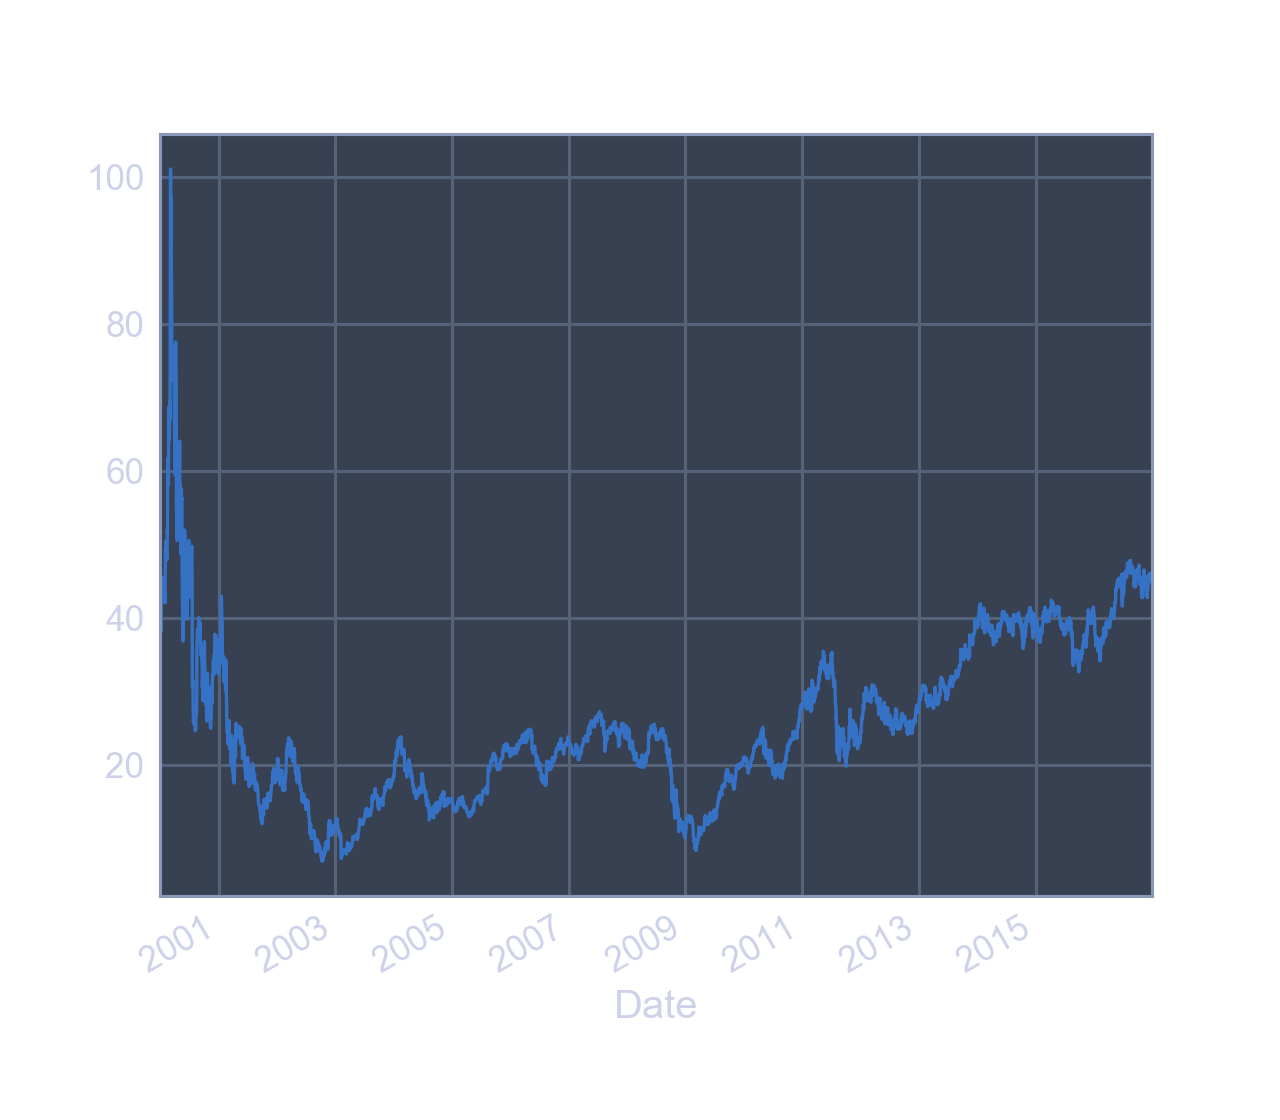

In [4]:
plt.figure()
df['Adj Close'].plot()
plt.show()

## Moving average

<IPython.core.display.Javascript object>


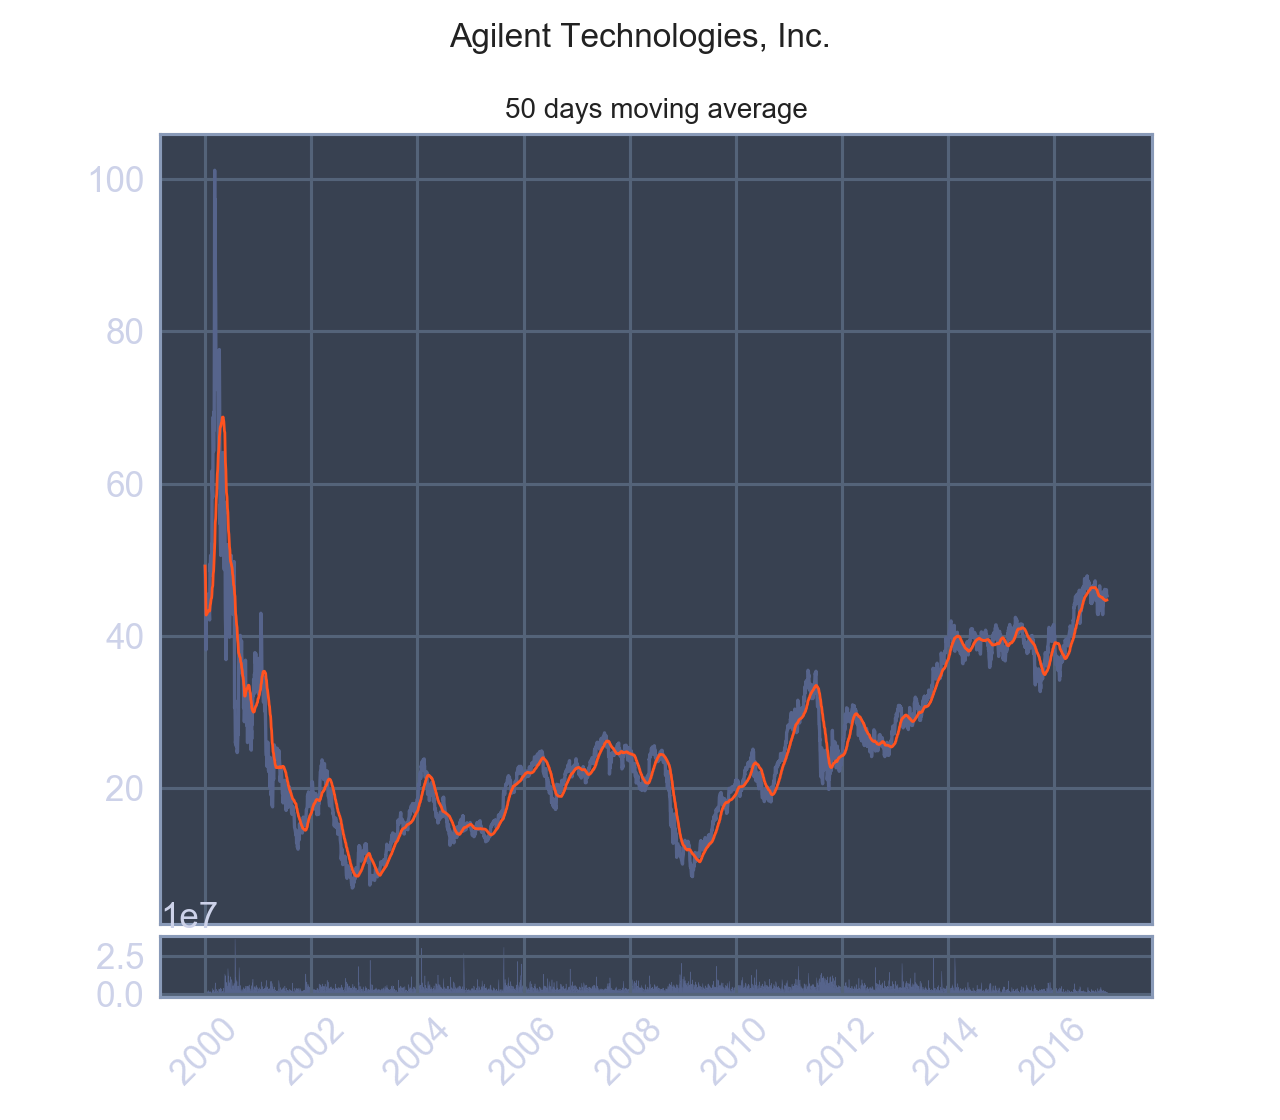

In [6]:
plt.figure()

df_ma = df.copy()
# Creating the rolling avg column
df_ma['50MA'] = df_ma['Adj Close'].rolling(window=50, min_periods=0).mean()

# Axis 1
ax1 = plt.subplot2grid((12, 1), (0, 0), rowspan=11, colspan=1)
ax1.xaxis_date()
ax1.plot(df_ma.index, df_ma['Adj Close'], color='#56648C')
ax1.plot(df_ma.index, df_ma['50MA'], color='#FF5320', linewidth=1)
plt.title('50 days moving average', fontsize=10, color='k')

# Axis 2
ax2 = plt.subplot2grid((12, 1), (11, 0), rowspan=1, colspan=1, sharex=ax1)
ax2.fill_between(df_ma.index, df_ma['Volume'],
                 0, color='#56648C', label='Volume')

# Plot general
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.suptitle('Agilent Technologies, Inc.', fontsize=12, color='k')
plt.show()

## Candlestick plot of one stock

<IPython.core.display.Javascript object>


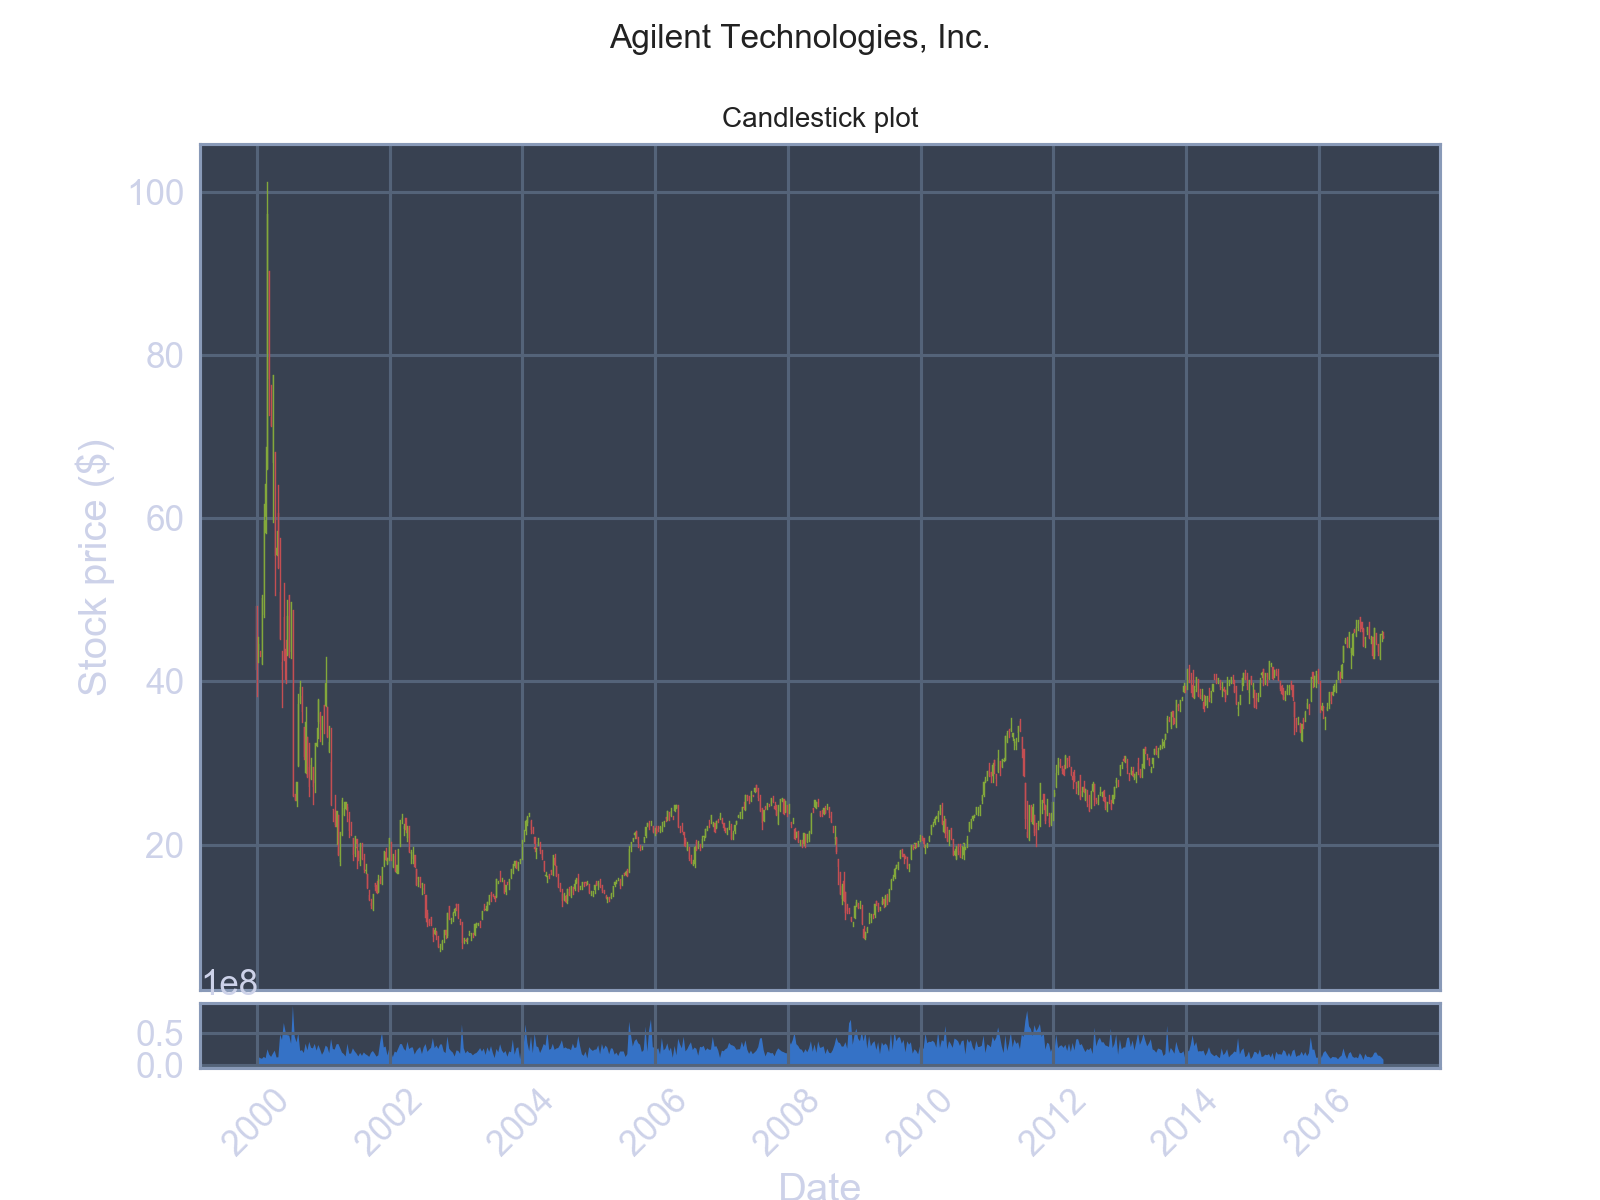

In [5]:
plt.figure(figsize=(8,6))
date2num = matplotlib.dates.date2num

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_vol = df['Volume'].resample('10D').sum().to_frame()

df_ohlc.reset_index(inplace=True)
df_vol.reset_index(inplace=True)

# Converting the dates to the matplotlib's date format
df_ohlc['Date'] = df_ohlc['Date'].map(date2num)
df_vol['Date'] = df_vol['Date'].map(date2num)

# Axis 1
ax1 = plt.subplot2grid((12, 1), (0, 0), rowspan=11, colspan=1)
ax1.xaxis_date()
# Plotting the candlestick
candlestick_ohlc(ax1, df_ohlc.values, colorup='g', width=2)
ax1.set_title('Candlestick plot', fontsize=10, color='k')
ax1.yaxis.set_label_text('Stock price ($)')

# Axis 2
ax2 = plt.subplot2grid((12, 1), (11, 0), rowspan=1, colspan=1, sharex=ax1)

# Fill between two curves
# (x, y_high, y_low)
ax2.fill_between(df_vol['Date'], df_vol['Volume'], 0, label='Volume')
ax2.xaxis.set_label_text('Date')

# General
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.suptitle('Agilent Technologies, Inc.', fontsize=12, color='k')
# plt.show()
plt.savefig('candlestick.pdf')